### Handwritten Digit prediction using Classification Analysis

###This dataset consist of 8X8 pixle images if digits. The images attribute of the dataset stores 8X8 arrays of grayscale values for each image. We will visualize first few images with the help of arrays. The target attrbute stores the digit each image represent.

###Import Libraries

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

###Import Data

In [5]:
from sklearn.datasets import load_digits

In [6]:
df = load_digits()

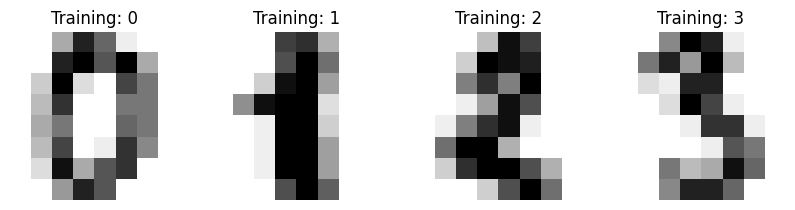

In [7]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" %label)

###Data Preprocessing

In [8]:
df.images.shape

(1797, 8, 8)

In [10]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
df.images[0].shape

(8, 8)

In [12]:
len(df.images)

1797

In [13]:
n_samples = len(df.images)
data = df.images.reshape(n_samples,-1)

In [14]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
data[0].shape

(64,)

In [16]:
data.shape

(1797, 64)

###Scaling Image Data

In [17]:
data.min()

0.0

In [18]:
data.max()

16.0

In [19]:
data = data/16

In [20]:
data.min()

0.0

In [21]:
data.max()

1.0

In [22]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

###Train Test Split Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train , X_test, y_train, y_test = train_test_split(data, df.target, train_size=0.3)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((539, 64), (1258, 64), (539,), (1258,))

###Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier()

In [29]:
rf.fit(X_train, y_train)

RandomForestClassifier()

###Predict Test Data

In [30]:
y_pred = rf.predict(X_test)

In [31]:
y_pred

array([2, 9, 9, ..., 7, 0, 2])

###Model *Accuracy*

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
confusion_matrix(y_test, y_pred)

array([[119,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 113,   0,   1,   0,   0,   0,   0,   0,   3],
       [  0,   1, 126,   0,   0,   0,   0,   0,   0,   0],
       [  1,   2,   0, 123,   0,   3,   0,   1,   1,   2],
       [  0,   0,   0,   0, 124,   0,   0,   2,   1,   0],
       [  0,   0,   0,   0,   2, 116,   0,   0,   1,   3],
       [  1,   2,   0,   0,   1,   1, 128,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 130,   1,   1],
       [  0,   6,   0,   0,   0,   1,   0,   0, 116,   0],
       [  0,   2,   0,   1,   0,   2,   0,   3,   4, 112]])

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       0.90      0.97      0.93       117
           2       1.00      0.99      1.00       127
           3       0.98      0.92      0.95       133
           4       0.97      0.98      0.97       127
           5       0.94      0.95      0.95       122
           6       1.00      0.96      0.98       133
           7       0.96      0.98      0.97       132
           8       0.94      0.94      0.94       123
           9       0.93      0.90      0.91       124

    accuracy                           0.96      1258
   macro avg       0.96      0.96      0.96      1258
weighted avg       0.96      0.96      0.96      1258

